In [2]:
import jax
import jax.numpy as jnp
import numpy as np
import flashbax as fbx
from flashbax.vault import Vault
from scipy.stats import norm
import matplotlib.pyplot as plt
import copy
import flashbax
from flashbax.buffers.trajectory_buffer import TrajectoryBufferState
import pickle

# Incomplete not-used notebook: idea was to process info to just get repeating pairs. idea abandoned for now
We need some components:
- Download and unzip the vault (not handled here)
- Load vaults
- Read and process vaults

We want the following:
- a measure of diversity of actions per state
- a measure of diversity of observed rewards per state-action pair
- a measure of how much of the data is unique
- a measure of skewness - maybe an exponential like we see with that one law

In [5]:
def get_action_coverage_given_state(offline_data, return_per_agent=False):
    rewards = offline_data['rewards'][0, :, 0]
    states = offline_data['infos']["state"]
    state_pairs = np.concatenate((states,offline_data["actions"]),axis=-1)
    print(state_pairs.shape)

    vals, indices, counts = np.unique(state_pairs,axis=1, return_inverse=True,return_counts=True)
    bucketed_rewards = [[] for _ in range(vals.shape[1])]
    
    print(len(vals))
    print(max(indices))
    print(len(indices))

    for i, idx in enumerate(indices):
        bucketed_rewards[idx].append(float(rewards[i]))

    return vals, indices, counts, bucketed_rewards

In [8]:
# vlt = Vault(rel_dir="vaults", vault_name="qmix_2s3z_42", vault_uid="20240409151430")
rel_dir="vaults/smac_v2/terran_5_vs_5"
vault_name="500_000"
uids = ["Replay","Random"]

for uid in uids:
    vlt = Vault(rel_dir=rel_dir, vault_name=vault_name, vault_uid=uid)
    all_data = vlt.read()
    offline_data = all_data.experience
    del vlt
    del all_data

    vals, indices, counts, rewards = get_unique_obs_actions_with_reward(offline_data,return_per_agent=True)

    with open(rel_dir+"/"+vault_name+"/"+uid+"/count_info.pickle","wb") as f:
        pickle.dump((vals,indices,counts, rewards),f)

    del vlt


An NVIDIA GPU may be present on this machine, but a CUDA-enabled jaxlib is not installed. Falling back to cpu.


Loading vault found at /home/louise/workspace/og-marl/development/vaults/smac_v2/terran_5_vs_5/500_000/Replay
(1, 499944, 5, 82)
(1, 499944, 5, 83)
(1, 499944, 125)
1
347073
499944
1
336045
499944
1
321906
499944
1
318259
499944
1
364889
499944
1
487010
499944
1
499520
499944
Loading vault found at /home/louise/workspace/og-marl/development/vaults/smac_v2/terran_5_vs_5/500_000/Random
(1, 499997, 5, 82)
(1, 499997, 5, 83)
(1, 499997, 125)
1
366555
499997
1
331120
499997
1
316276
499997
1
310656
499997
1
355470
499997
1
498822
499997
1
452893
499997


In [5]:
rel_dir="vaults"
vault_name="500000_5m_vs_6m"
vault_uid="Poor"
vlt = Vault(rel_dir=rel_dir, vault_name=vault_name, vault_uid=vault_uid)

Loading vault found at /home/louise/workspace/og-marl/development/vaults/500000_5m_vs_6m/Poor


In [7]:
all_data = vlt.read()
offline_data = all_data.experience

print(offline_data.keys())
print(offline_data["infos"]["state"].shape)

dict_keys(['actions', 'infos', 'observations', 'rewards', 'terminals', 'truncations'])
(1, 499988, 98)


In [8]:
print(offline_data["infos"]["state"].shape)

(1, 499981, 98)


In [6]:
vals, indices, counts = get_unique_obs_actions(offline_data,return_per_agent=True)

(1, 99990, 5, 80)
(1, 99990, 5, 81)


In [15]:
bucketed = [[] for i in range(len(vals))]
print(indices["agent0"])
rewards = offline_data['rewards'][0, :, 0]
print(rewards)
print(rewards[indices["agent0"]])

[ 1412  1745 23891 ...     0     0     0]
[0.         0.         0.         ... 0.01960784 0.01960784 0.01960784]
[0.13725491 0.4117647  0.         ... 0.         0.         0.        ]


In [28]:
vals, indices, counts, rewards = get_unique_obs_actions_with_reward(offline_data,return_per_agent=True)

(1, 499981, 5, 55)
(1, 499981, 5, 56)
1
342765
499981
1
301794
499981
1
300977
499981
1
295995
499981
1
250850
499981


In [34]:
vals["joint"][0,132526,:]

array([[1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 3.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0

In [30]:
print([len(x) for x in rewards["joint"]])

[6, 4, 4, 6, 5, 15, 7, 1, 1, 1, 1, 1, 2, 2, 5, 3, 1, 1, 6, 26, 31, 24, 18, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 2, 1, 1, 2, 1, 1, 1, 3, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 4, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1

In [33]:
print(np.argmax(counts["joint"]))

132526


In [4]:
def get_unique_state_actions_with_reward(offline_data):
    states = offline_data["infos"]["state"]
    rewards = offline_data['rewards'][0, :, 0]
    # expand the actions dimensions for easy adding
    actions = np.expand_dims(offline_data["actions"],axis=-1)
    print(states.shape)
    pairs = np.concatenate((states,actions),axis=-1)
    print(pairs.shape)
    
    vals, indices, counts = np.unique(pairs[:,:,:,:],axis=1, return_inverse=True, return_counts=True)

    bucketed_rewards = [[] for _ in range(vals.shape[1])]
    for i, idx in enumerate(indices):
        bucketed_rewards[idx].append(float(rewards[i]))

    return vals, indices, counts, bucketed_rewards

In [17]:
print([c for c in counts["joint"] if c>20])

[140102, 93, 100, 98, 95, 91, 88, 90, 72, 96, 99, 114, 122, 114, 140, 301, 311, 340, 275, 244, 236, 211, 207, 223, 26, 26, 22, 47, 60, 45, 58, 53, 24, 28, 25, 1769, 1764, 1824, 1724, 1795, 21, 21, 26, 32, 32, 28, 29, 31, 23]


In [14]:
multiple_rewards_seen = [x for x in rewards["agent0"] if len(x)>2000]
print(len(multiple_rewards_seen))

1


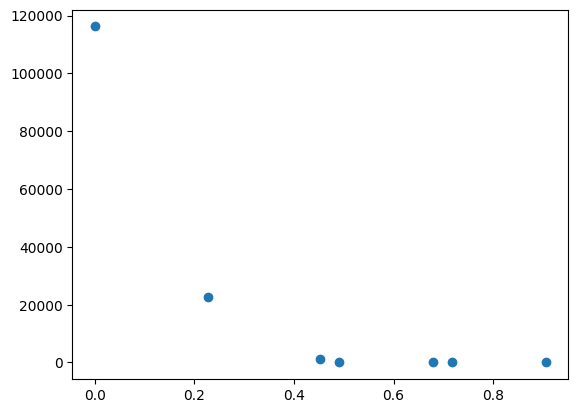

In [15]:
rval, rcount = np.unique(rewards["agent0"][0],return_counts=True)

plt.scatter(rval,rcount)

In [48]:
vals, indices, counts, rewards = get_unique_obs_actions_with_reward(offline_data,return_per_agent=True)

with open(rel_dir+"/"+vault_name+"/"+vault_uid+"/count_info.pickle","wb") as f:
    pickle.dump((vals,indices,counts),f)

(1, 99990, 5, 80)
(1, 99990, 5, 81)


In [13]:
print(vals["joint"].shape)
for agent_id in range(offline_data["actions"].shape[2]):
    print(vals["agent"+str(agent_id)].shape)

(1, 96998, 5, 81)
(1, 78114, 81)
(1, 81711, 81)
(1, 80539, 81)
(1, 83227, 81)
(1, 69309, 81)


In [9]:
import powerlaw
import math

In [14]:
vals2, counts2 = np.unique(counts,return_counts=True)

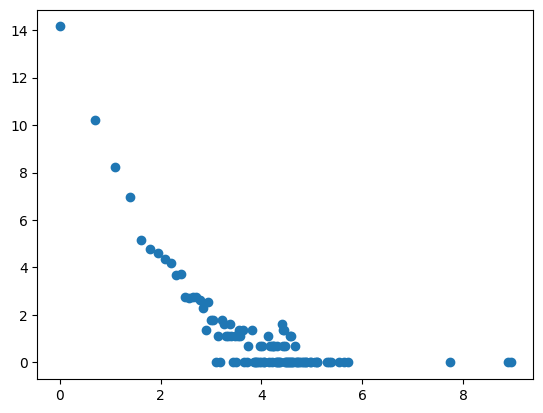

In [15]:
plt.scatter(np.log(vals2),np.log(counts2))

<Axes: >

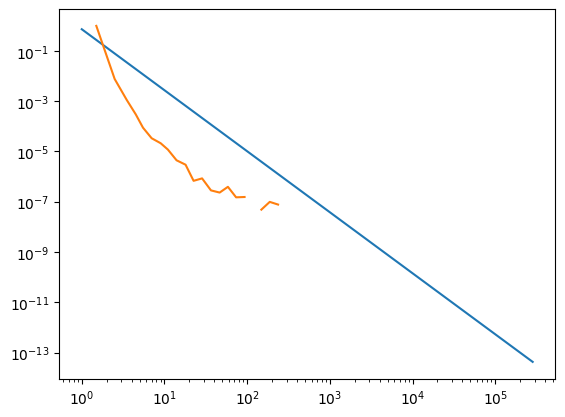

In [10]:
fit = powerlaw.Fit(counts,xmin=1,discrete=True)
fit.power_law.plot_pdf()
fit.plot_pdf()

In [48]:
print(vals.shape)
print(indices)
print(counts.shape)
print(len(counts[np.where(counts>0)]))

(1, 1176454, 81)
[ 28839  49360  55666 ... 542229 542228 182543]
(1176454,)
1176454


In [18]:
print(vals.shape[1]-1500000)

-323546


In [13]:
print(vals.shape[1]-1500000)

-51451


In [26]:
xx = np.random.normal(0,1,size=[3,4])
print(xx)
xx = np.zeros([3,4])
print(xx)
vals, counts = np.unique(xx,axis=0,return_counts=True)
print(len(vals))

[[-0.52887014  0.87261793 -0.7883088   1.66312254]
 [ 0.70034135 -1.08346965  0.71471305  1.00576933]
 [ 0.34972719 -0.34158451  0.75250257  0.31818675]]
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
1


In [5]:
# first store indices of episodes, then sort by episode return.
# outputs return, start, end and vault index in vault list
def sort_concat(returns,eps_ends, ids):

    episode_start_idxes = eps_ends[:-1]+1
    episode_start_idxes = jnp.insert(episode_start_idxes,0,0).reshape(-1,1)
    sorting_idxes = jnp.lexsort(jnp.array([returns[:,0]]), axis=-1)
    # print(sorting_idxes)

    return_start_end = jnp.concatenate([returns,episode_start_idxes.reshape(-1,1),eps_ends,ids],axis=-1)

    # return, start, end sorted by return value ascending
    sorted_return_start_end = return_start_end[sorting_idxes]
    return sorted_return_start_end

In [6]:
# given bin edges and a sorted array of values, get the bin number per value
def get_bin_numbers(sorted_values,bin_edges):
    bin_numbers = np.zeros_like(sorted_values)
    
    def get_bin_number(bin_num,value):
        is_overflowing = value>bin_edges[bin_num]

        if is_overflowing:
            bin_num += 1
            is_doubly_overflowing = value>bin_edges[bin_num]
            if is_doubly_overflowing:
                bin_num = get_bin_number(bin_num,value)
            
        return bin_num
    
    bin_bookmark = 0

    for i,val in enumerate(sorted_values):
        bin_bookmark = get_bin_number(bin_bookmark,val)
        bin_numbers[i] = bin_bookmark

    return bin_numbers

In [7]:
# sample from pdf according to heights
# BIG NOTE: CHECK THE DISPARITY, OTHERWISE YOUR DISTRIBUTION WILL BE TOO MUCH
def episode_idxes_sampled_from_pdf(pdf,bar_heights):
    num_to_sample = np.round(pdf).astype(int)
    sample_range_edges = np.concatenate([[0],np.cumsum(bar_heights)])

    assert num_to_sample.shape==bar_heights.shape

    target_sample_idxes = []
    for i,n_sample in enumerate(num_to_sample):
            sample_base = np.arange(sample_range_edges[i],sample_range_edges[i+1])
            print(sample_base)
            if n_sample<=0:
                 pass
            # if we sample more than all in the bar
            else:
                if n_sample>=bar_heights[i]:
                    sample_rest = np.random.choice(sample_base,n_sample-bar_heights[i],replace=True)
                    sample = np.concatenate([sample_base,sample_rest])
                else:
                    sample = np.random.choice(sample_base,n_sample,replace=True) #make false for no replace
                target_sample_idxes = target_sample_idxes+list(np.sort(sample))
    return target_sample_idxes

In [8]:
def sanity_check(sampled_idxes,returns):
    vals = np.array([returns[i] for i in sampled_idxes])
    return np.mean(vals), np.std(vals)

In [9]:
def preprocess(rel_dir,vault_name):
    vlts = get_all_vaults(rel_dir, vault_name)

    # get returns, term idxes for each episode per vault
    returns_list = []
    episode_end_list = []
    vault_ids = []
    for j,vault in enumerate(vlts):
        print(j)
        returns, episode_end_idxes = get_episode_returns_and_term_idxes(vault)
        returns_list.append(returns)
        episode_end_list.append(episode_end_idxes)
        vault_ids.append(jnp.zeros_like(returns)+j)

    # make np compatible
    all_returns = jnp.concatenate(returns_list)
    all_episode_end_idxes = jnp.concatenate(episode_end_list)
    all_vault_ids = jnp.concatenate(vault_ids)

    # concatenate then sort all results
    all_sorted_return_start_end = sort_concat(all_returns,all_episode_end_idxes, all_vault_ids)
    return vlts, all_sorted_return_start_end

In [10]:
def preprocess_vault(rel_dir,vault_name, vault_uid):
    vault = Vault(rel_dir=rel_dir, vault_name=vault_name,vault_uid=vault_uid)

    returns, episode_end_idxes = get_episode_returns_and_term_idxes(vault)
    
    all_sorted_return_start_end = sort_concat(returns,episode_end_idxes, jnp.zeros_like(returns))
    return vault, all_sorted_return_start_end

In [11]:
def bin_processed_data(all_sorted_return_start_end, n_bins=500):
    # get bin edges, including final endpoint
    bin_edges = jnp.linspace(start=min(min(all_sorted_return_start_end[:,0]),0), stop = max(all_sorted_return_start_end[:,0]), num=n_bins,endpoint=True)
    print(all_sorted_return_start_end.shape[0])

    # get bin numbers
    bin_numbers = get_bin_numbers(all_sorted_return_start_end[:,0], bin_edges)
    print(bin_numbers.shape[0])

    bar_labels, bar_heights= np.unique(bin_numbers,return_counts=True)

    padded_heights = np.zeros(n_bins)
    for bar_l, bar_h in zip(bar_labels,bar_heights):
        padded_heights[int(bar_l)] = bar_h

    return bar_labels, bar_heights, padded_heights, bin_edges, bin_numbers
        

# Main: for plugging different datasets and playing
Here, we use the above. We:
- Preprocess datasets
- Bin them etc
- Figure out distribution
- Package them again

## Preprocess and bin

In [16]:
# get base vaults
vlt_1, vlt1_sorted_return_start_end = preprocess_vault(rel_dir="vaults", vault_name="qmix_2s3z_42", vault_uid = "20240409151430")
vlt_2, vlt2_sorted_return_start_end = preprocess_vault(rel_dir="vaults", vault_name="idrqn_2s3z_42", vault_uid="20240410144041")

Loading vault found at /home/louise/workspace/og-marl/development/vaults/qmix_2s3z_42/20240409151430


Loading vault found at /home/louise/workspace/og-marl/development/vaults/idrqn_2s3z_42/20240410144041


25901
25901


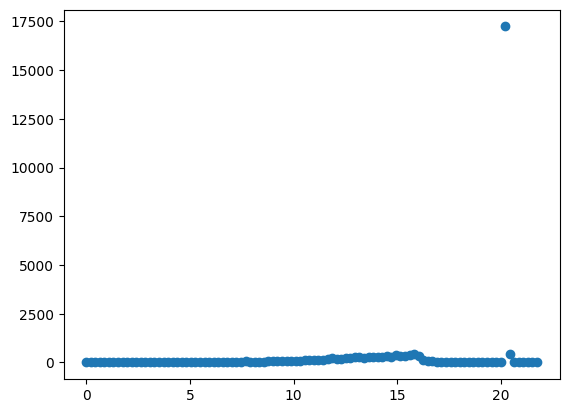

[    2     1     1     1     1     1     2     3     5     5     6    14
     7    19    20    19    19    21    25    30    23    32    28    27
    39    35    44    38    39    57    42    42    35    48    60    58
    67    83    80    97    85    81   127   130   125   127   139   158
   205   162   200   214   220   286   264   251   279   271   264   295
   309   294   391   322   357   362   423   309   139    76    55    16
    10     5     1     1 17242   417    48    21    21     9     9     5]


In [13]:
bar_labels, bar_heights, padded_heights, bin_edges, bin_numbers = bin_processed_data(vlt1_sorted_return_start_end, n_bins=100)
plt.scatter(bin_edges,padded_heights)
plt.show()
print(bar_heights)

In [29]:
test = [0,1,2,3,4]
test_2 = [0,1,3,5]

In [23]:
# try to get all of the similar vaults
# base_returns = vlt1_sorted_return_start_end[:,0]
# comp_returns = vlt2_sorted_return_start_end[:,0]

def get_idxes_of_similar_subsets(base_returns, comp_returns, tol=0.1):
    base_selected_idxes = []
    comp_selected_idxes = []

    comp_idx = 0

    for i, ret in enumerate(base_returns):
        # print("Run "+str(i))
        ret_dealt_with = False
        while comp_idx<len(comp_returns) and (comp_returns[comp_idx]<=(ret+tol)) and not ret_dealt_with:
            # check comp is in bracket below
            if np.abs((ret-comp_returns[comp_idx]))<tol:
                base_selected_idxes.append(i)
                comp_selected_idxes.append(comp_idx)
                ret_dealt_with = True
            comp_idx+= 1

    return base_selected_idxes, comp_selected_idxes

In [35]:
b,c = get_idxes_of_similar_subsets(test,test_2,tol=0.1)

Run 0
Added
yay
Run 1
Added
yay
Run 2
Added
yay
Run 3
Run 4
Added
yay


In [36]:
print(b)
print(c)

[0, 1, 2, 4]
[0, 1, 2, 3]


In [25]:
base_ret = vlt1_sorted_return_start_end[:,0]
comp_ret = vlt2_sorted_return_start_end[:,0]

b,c = get_idxes_of_similar_subsets(base_ret,comp_ret,tol=0.01)
print(len(b))

16927


In [26]:
def stitch_vault_from_sampled_episodes_(vlts, return_start_end_sample, vault_name):

    all_data = vlts[0].read()
    offline_data = all_data.experience

    dest_buffer = fbx.make_trajectory_buffer(
        # Sampling parameters
        sample_batch_size=1,
        sample_sequence_length=1,
        period=1,
        # Not important in this example, as we are not adding to the buffer
        max_length_time_axis=500_000,
        min_length_time_axis=100,
        add_batch_size=1,
    )

    dummy_experience = jax.tree_map(lambda x: x[0, 0, ...], all_data.experience)
    del offline_data
    del all_data

    dest_state = dest_buffer.init(dummy_experience)
    buffer_add = jax.jit(dest_buffer.add, donate_argnums=0)
    dest_vault = flashbax.vault.Vault(
        experience_structure=dest_state.experience,
        vault_name=vault_name,
    )

    for vault_id, vlt in enumerate(vlts):
        samples_frm_this_vault = return_start_end_sample[np.where(return_start_end_sample[:,-1]==vault_id)]
        starts = samples_frm_this_vault[:,1]
        ends = samples_frm_this_vault[:,2]

        all_data = vlt.read()
        offline_data = all_data.experience

        for start,end in zip(starts,ends):
            sample_experience = jax.tree_util.tree_map(lambda x: x[:,int(start):int(end+2),...],offline_data)
            dest_state = buffer_add(dest_state, sample_experience)
        
        timesteps_written = dest_vault.write(dest_state)

        print(timesteps_written)
        del offline_data
        del all_data     
    return 

In [64]:
d1_samples = vlt1_sorted_return_start_end[b,:]
d2_samples = vlt2_sorted_return_start_end[c,:]

vault_name = "d1_8m_qmix"
sample_experience = stitch_vault_from_sampled_episodes_(vlt_1,d1_samples,vault_name)

New vault created at /home/louise/workspace/og-marl/development/vaults/cherry_lemon_cheetah/20240403135033
Since the provided buffer state has a temporal dimension of 500000, you must write to the vault at least every 499999 timesteps to avoid data loss.
134134
386386
0


Loading vault found at /home/louise/workspace/og-marl/development/vaults/smac_v1_cl/5m_vs_6m.vlt/lemon
Loading vault found at /home/louise/workspace/og-marl/development/vaults/smac_v1_cl/5m_vs_6m.vlt/cherry


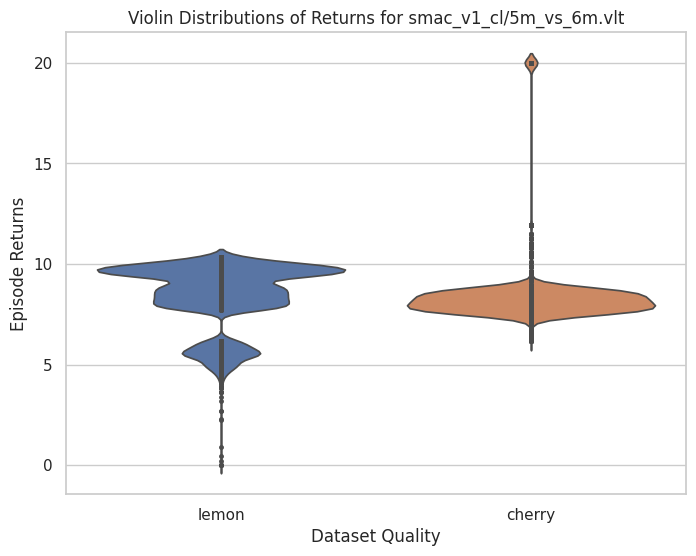

{'lemon': Array([ 0.       ,  0.       ,  2.3018868, ..., 10.339623 , 10.339623 ,
        10.339623 ], dtype=float32),
 'cherry': Array([ 7.54717 ,  7.54717 ,  7.54717 , ..., 11.962263, 11.962264,
        19.999998], dtype=float32)}

In [52]:
from og_marl.offline_dataset import analyse_vault

analyse_vault("smac_v1_cl/5m_vs_6m.vlt",vault_uids=["lemon","cherry"], visualise=True)
# analyse_vault("cherry", visualise=True)

## Not necessary for this really

In [60]:
# cumulative summing per-episode
def get_episode_returns_and_term_idxes(vlt):
    all_data = vlt.read()
    offline_data = all_data.experience

    rewards = offline_data['rewards'][0, :, 0]
    terminal_flag = offline_data['terminals'][0, :, ...].all(axis=-1)

    assert terminal_flag[-1]==True

    def scan_cumsum(return_so_far,prev_term_reward):
        term, reward = prev_term_reward
        return_so_far = return_so_far*(1-term)+ reward
        return return_so_far, return_so_far
    
    xs = (terminal_flag[:-1], rewards[1:])
    
    _, cumsums = jax.lax.scan(scan_cumsum, rewards[0],xs)

    term_idxes = np.argwhere(terminal_flag)

    # shift back as we did for the loop
    return cumsums[term_idxes-1], term_idxes